In [1]:
import numpy as np
import pandas as pd
import matplotlib
import seaborn as sns #for plotting
import matplotlib.pyplot as plt
from matplotlib import pylab
from scipy import stats

from scipy.stats import spearmanr,pointbiserialr  # for Spearman Correlation and Biserial
from statsmodels.stats.stattools import durbin_watson
from sklearn import preprocessing

import statsmodels.api as sm
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
from sklearn.metrics import confusion_matrix
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import anderson, norm, uniform
from skgof import cvm_test, ks_test
import statsmodels.stats.diagnostic as sm_diagnostic

from warnings import filterwarnings
filterwarnings('ignore')

C:\Users\user\anaconda3\lib\site-packages\skgof\ecdfgof.py:45: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  from .cvmdist import cvm_unif


In [2]:
data = pd.read_csv(r"C:\Users\user\OneDrive\Υπολογιστής\data\3\temperature_data.csv",parse_dates=['Date'])
df = data.copy()

In [3]:
df.head()

,Date,State,Country,Cumulative_cases,Cumulative_death,Daily_cases,Daily_death,Latitude,Longitude,Temperature,Wind_speed,Precipitation,Fog_Presence
0,2020-01-22,NaN,Afghanistan,0,0,0,0,33.0,65.0,5.89,9.4,0.00,0
1,2020-01-23,NaN,Afghanistan,0,0,0,0,33.0,65.0,5.56,14.9,0.00,1
2,2020-01-24,NaN,Afghanistan,0,0,0,0,33.0,65.0,4.50,10.4,0.17,1
3,2020-01-25,NaN,Afghanistan,0,0,0,0,33.0,65.0,7.78,6.1,0.57,1
4,2020-01-26,NaN,Afghanistan,0,0,0,0,33.0,65.0,6.00,10.8,0.00,1


In [4]:
print(df['Date'])

0       2020-01-22
1       2020-01-23
2       2020-01-24
3       2020-01-25
4       2020-01-26
           ...    
20283   2020-03-26
20284   2020-03-27
20285   2020-03-28
20286   2020-03-29
20287   2020-03-30
Name: Date, Length: 20288, dtype: datetime64[ns]


In [5]:
#Remove the dates where the cases are zero

In [6]:
pf=df[df.Cumulative_cases != 0]

In [7]:
pf1 = pf.drop(['State','Daily_cases','Daily_death','Latitude','Longitude'], axis=1)

In [10]:
#Mean for each group of countries
country_list = pf1['Country'].unique()
cumulated_cases = []
deaths = []
temperature = []
wind = []
precipitation = []
fog = []

for country in country_list:
    country_wise = pf1['Country'] == country  
    test_data = pf1[country_wise]
    
    cumulated_cases.append(test_data['Cumulative_cases'].sum())
    deaths.append(test_data['Cumulative_death'].sum())
    temperature.append(test_data['Temperature'].mean())
    wind.append(test_data['Wind_speed'].mean())
    precipitation.append(test_data['Precipitation'].mean())
    fog.append(test_data['Fog_Presence'].mean())
    
#Converting the lists to a pandas dataframe.

country_dataset = {'Country' : country_list, 'Cumulative_cases' : cumulated_cases, 'Cumulative_death' : deaths, 'Temperature':temperature,'Wind_speed':wind,'Precipitation':precipitation,'Fog_Presence':fog}
country_dataset = pd.DataFrame(country_dataset)

In [11]:
country_dataset.head()

,Country,Cumulative_cases,Cumulative_death,Temperature,Wind_speed,Precipitation,Fog_Presence
0,Afghanistan,1486,33,3.565789,4.950000,0.460263,0.921053
1,Albania,1989,76,12.589091,2.550000,0.036818,0.363636
2,Algeria,4112,280,21.968286,8.902857,0.000000,0.000000
3,Andorra,2411,27,1.746897,2.437931,0.076897,0.000000
4,Angola,41,4,28.393636,6.509091,0.000000,0.181818


In [13]:
country_dataset.corr()

,Cumulative_cases,Cumulative_death,Temperature,Wind_speed,Precipitation,Fog_Presence
Cumulative_cases,1.000000,0.916577,-0.156583,-0.004833,-0.010191,0.028177
Cumulative_death,0.916577,1.000000,-0.137905,-0.020227,-0.009810,-0.002177
Temperature,-0.156583,-0.137905,1.000000,-0.134402,0.079185,-0.215772
Wind_speed,-0.004833,-0.020227,-0.134402,1.000000,-0.078720,0.009290
Precipitation,-0.010191,-0.009810,0.079185,-0.078720,1.000000,0.300752
Fog_Presence,0.028177,-0.002177,-0.215772,0.009290,0.300752,1.000000


In [14]:
pfc = country_dataset.drop('Country', axis=1)

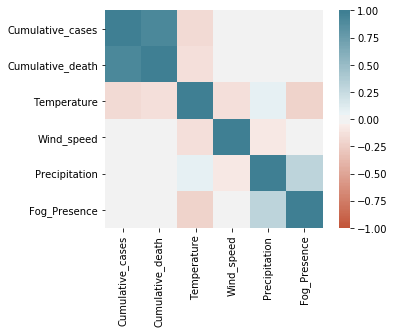

In [15]:
corr = pfc.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        vmin=-1, vmax=1, center=0,
        cmap=sns.diverging_palette(20, 220, n=200),
        square=True)

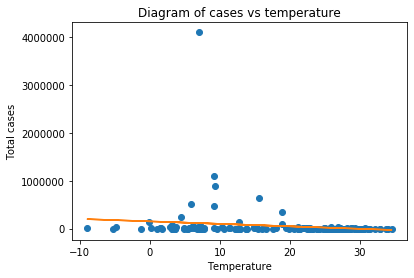

In [12]:
xi = country_dataset.Temperature
y = country_dataset.Cumulative_cases

slope, intercept, r_value, p_value, std_err = stats.linregress(xi,y)
line = slope*xi+intercept

plt.plot(xi,y,'o', xi, line)
plt.xlabel("Temperature")
plt.ylabel("Total cases")
plt.title('Diagram of cases vs temperature')
ax = plt.gca()
fig = plt.gcf()

In [16]:
#Remove outliers with z-score
z_scores = stats.zscore(pfc)
#calculate z-scores of `pf5`

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_df = pfc[filtered_entries]

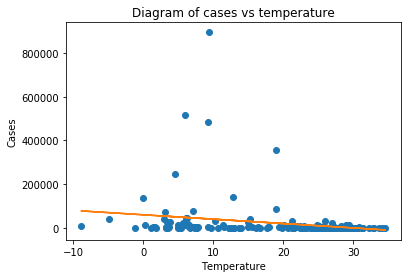

In [17]:
xi = new_df.Temperature
y = new_df.Cumulative_cases

slope, intercept, r_value, p_value, std_err = stats.linregress(xi,y)
line = slope*xi+intercept

plt.plot(xi,y,'o', xi, line)
plt.xlabel("Temperature")
plt.ylabel("Cases")
plt.title('Diagram of cases vs temperature')
ax = plt.gca()
fig = plt.gcf()

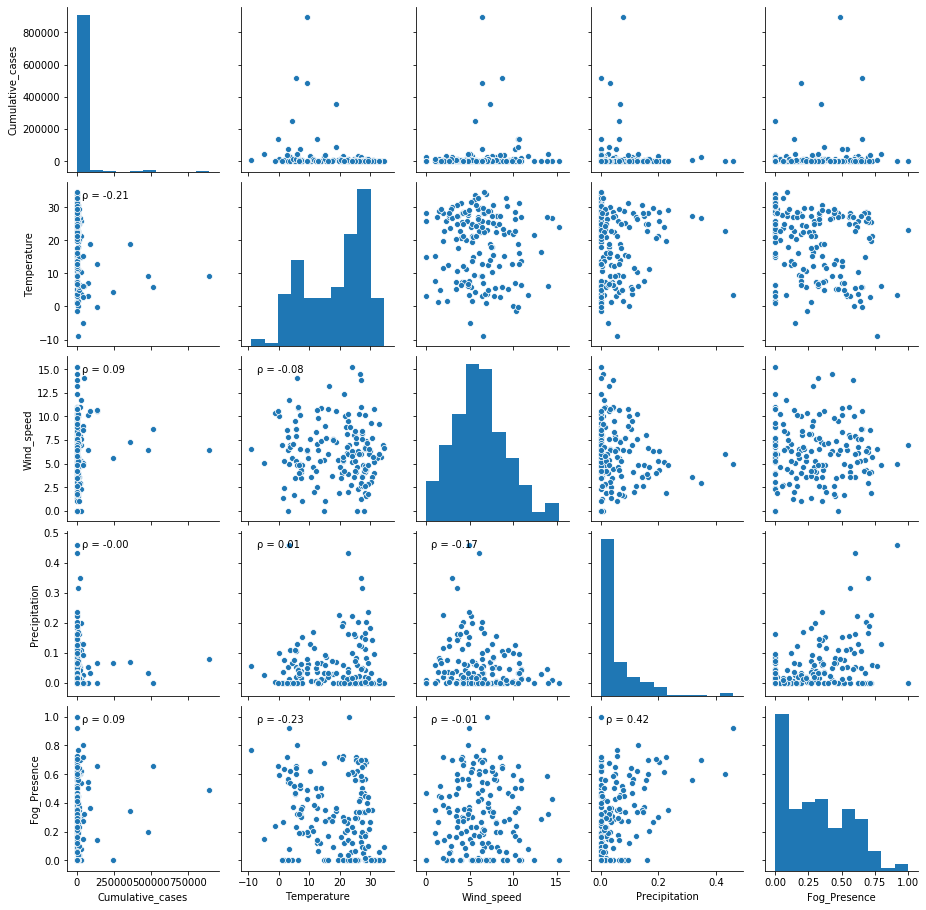

In [18]:
from scipy.stats import pearsonr

def corrfunc(x,y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    # Unicode for lowercase rho (ρ)
    rho = '\u03C1'
    ax.annotate(f'{rho} = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes)
    
g = sns.pairplot(new_df, vars=["Cumulative_cases","Temperature","Wind_speed","Precipitation","Fog_Presence"])
g.map_lower(corrfunc)
plt.show()

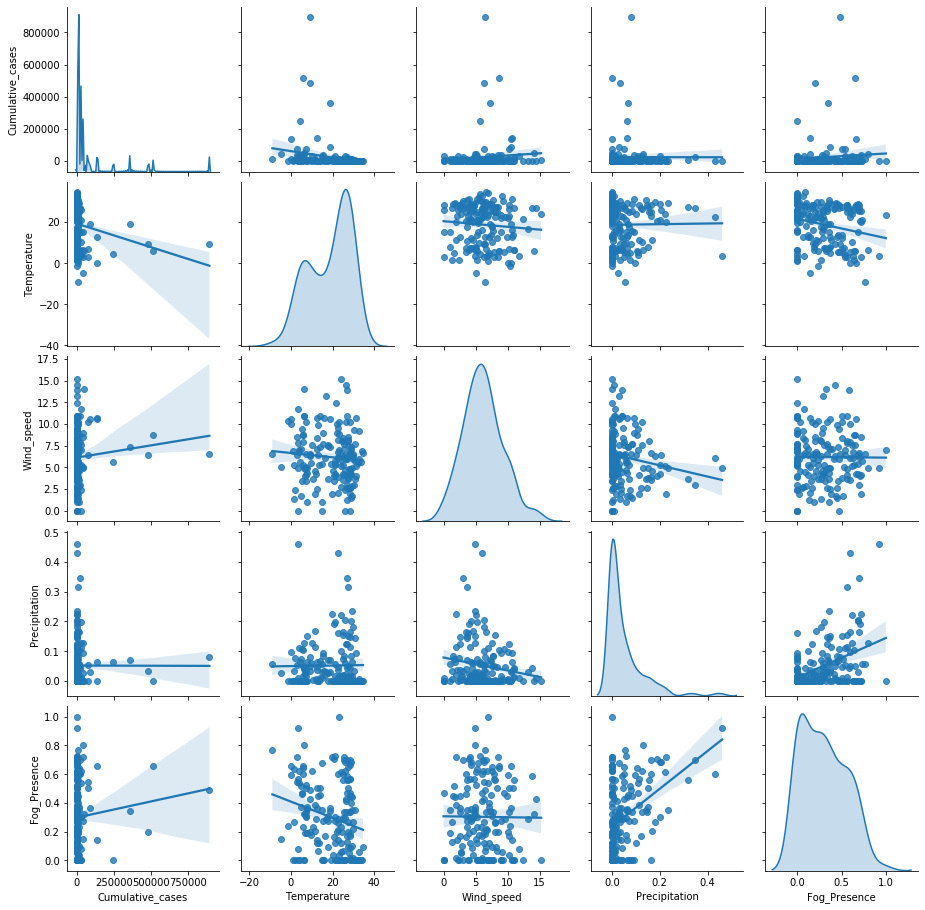

In [19]:
sns.pairplot(new_df, diag_kind="kde", kind="reg", vars=["Cumulative_cases","Temperature","Wind_speed","Precipitation","Fog_Presence"])

In [20]:
#Log of cases
country_dataset['log_Cumulative_cases'] = np.log10(country_dataset['Cumulative_cases'])

In [21]:
country_dataset.corr()

,Cumulative_cases,Cumulative_death,Temperature,Wind_speed,Precipitation,Fog_Presence,log_Cumulative_cases
Cumulative_cases,1.000000,0.916577,-0.156583,-0.004833,-0.010191,0.028177,0.402977
Cumulative_death,0.916577,1.000000,-0.137905,-0.020227,-0.009810,-0.002177,0.399740
Temperature,-0.156583,-0.137905,1.000000,-0.134402,0.079185,-0.215772,-0.537246
Wind_speed,-0.004833,-0.020227,-0.134402,1.000000,-0.078720,0.009290,0.050008
Precipitation,-0.010191,-0.009810,0.079185,-0.078720,1.000000,0.300752,-0.138678
Fog_Presence,0.028177,-0.002177,-0.215772,0.009290,0.300752,1.000000,0.047852
log_Cumulative_cases,0.402977,0.399740,-0.537246,0.050008,-0.138678,0.047852,1.000000


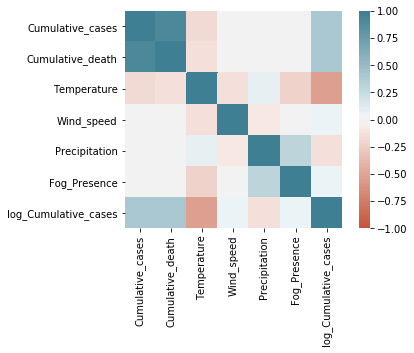

In [22]:
corr = country_dataset.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        vmin=-1, vmax=1, center=0,
        cmap=sns.diverging_palette(20, 220, n=200),
        square=True)

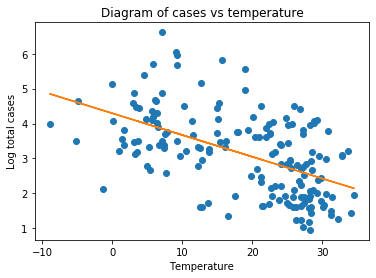

In [23]:
xi = country_dataset.Temperature
y = country_dataset.log_Cumulative_cases

slope, intercept, r_value, p_value, std_err = stats.linregress(xi,y)
line = slope*xi+intercept

plt.plot(xi,y,'o', xi, line)
plt.xlabel("Temperature")
plt.ylabel("Log total cases")
plt.title('Diagram of cases vs temperature')
ax = plt.gca()
fig = plt.gcf()

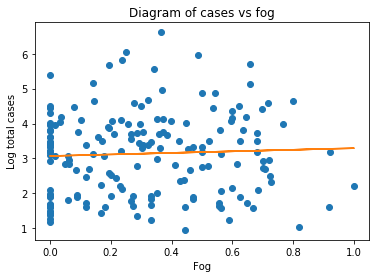

In [26]:
xi = country_dataset.Fog_Presence
y = country_dataset.log_Cumulative_cases

slope, intercept, r_value, p_value, std_err = stats.linregress(xi,y)
line = slope*xi+intercept

plt.plot(xi,y,'o', xi, line)
plt.xlabel("Fog")
plt.ylabel("Log total cases")
plt.title('Diagram of cases vs fog')
ax = plt.gca()
fig = plt.gcf()

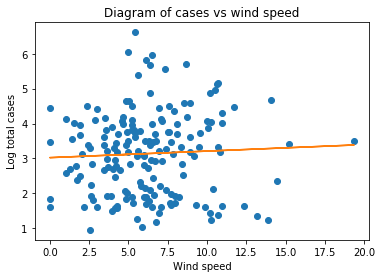

In [27]:
xi = country_dataset.Wind_speed
y = country_dataset.log_Cumulative_cases

slope, intercept, r_value, p_value, std_err = stats.linregress(xi,y)
line = slope*xi+intercept

plt.plot(xi,y,'o', xi, line)
plt.xlabel("Wind speed")
plt.ylabel("Log total cases")
plt.title('Diagram of cases vs wind speed')
ax = plt.gca()
fig = plt.gcf()

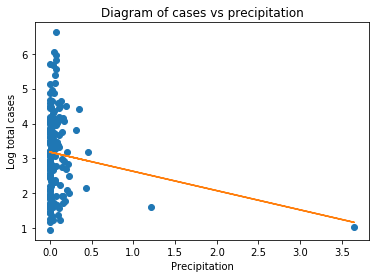

In [28]:
xi = country_dataset.Precipitation
y = country_dataset.log_Cumulative_cases

slope, intercept, r_value, p_value, std_err = stats.linregress(xi,y)
line = slope*xi+intercept

plt.plot(xi,y,'o', xi, line)
plt.xlabel("Precipitation")
plt.ylabel("Log total cases")
plt.title('Diagram of cases vs precipitation')
ax = plt.gca()
fig = plt.gcf()

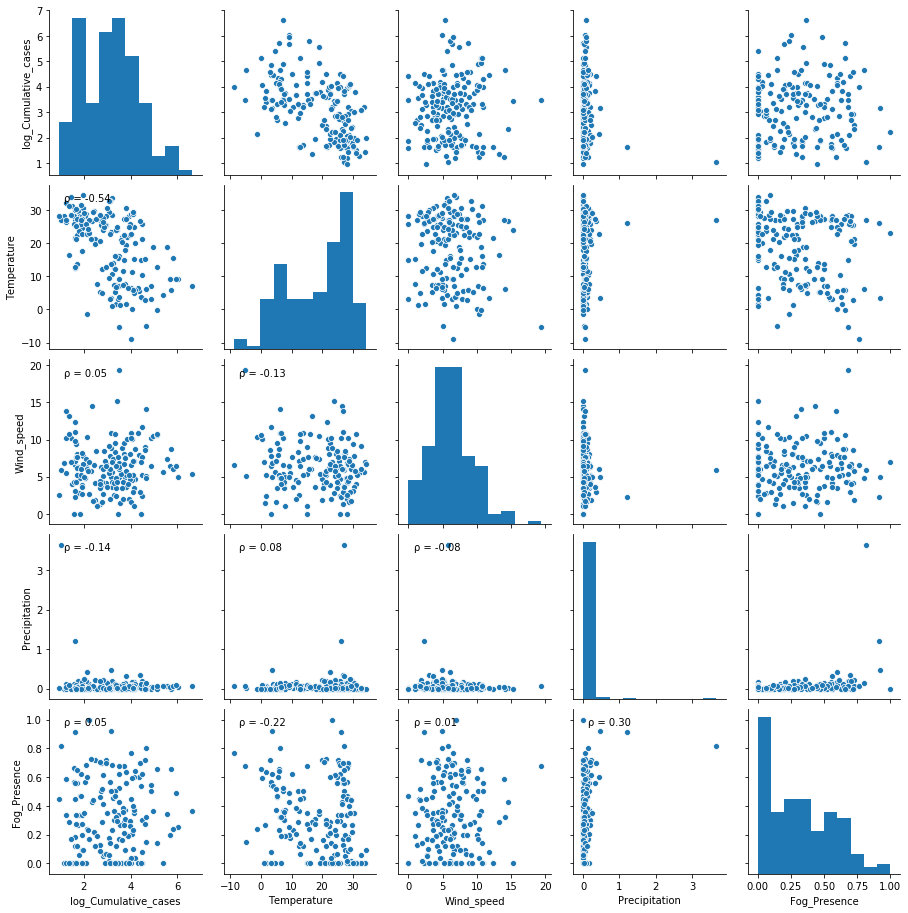

In [24]:
from scipy.stats import pearsonr

def corrfunc(x,y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    # Unicode for lowercase rho (ρ)
    rho = '\u03C1'
    ax.annotate(f'{rho} = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes)
    
g = sns.pairplot(country_dataset, vars=["log_Cumulative_cases","Temperature","Wind_speed","Precipitation","Fog_Presence"])
g.map_lower(corrfunc)
plt.show()

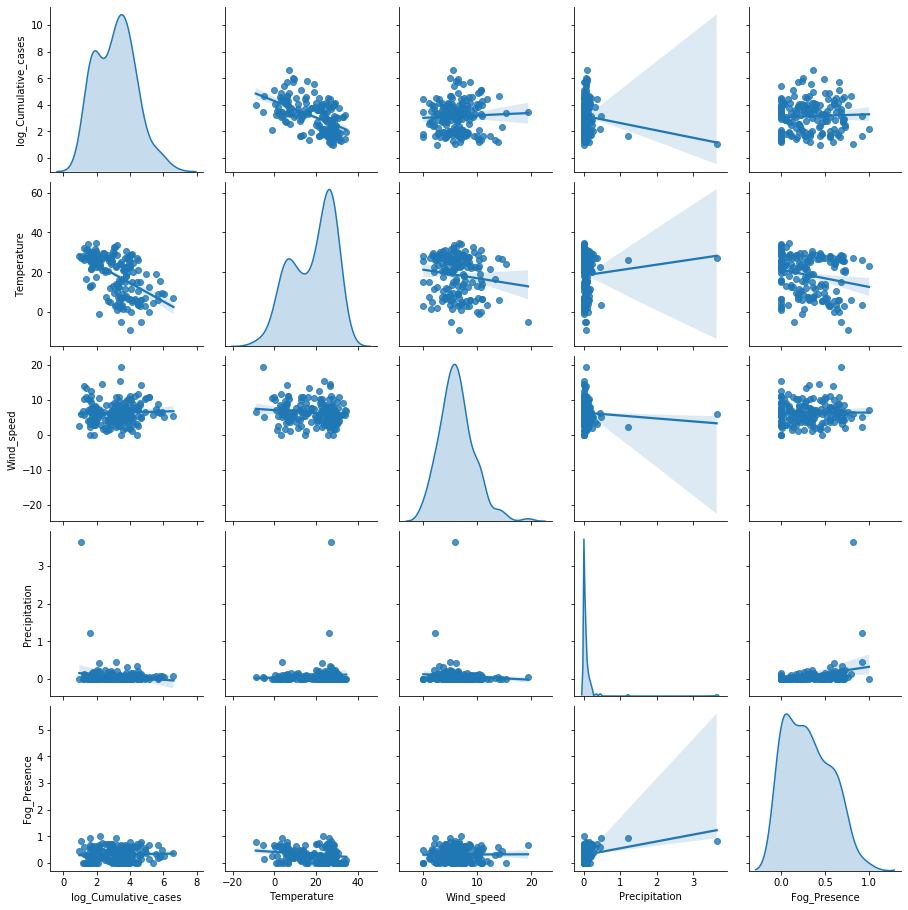

In [25]:
sns.pairplot(country_dataset, diag_kind="kde", kind="reg", vars=["log_Cumulative_cases","Temperature","Wind_speed","Precipitation","Fog_Presence"])


In [29]:
#Covariance
country_dataset.Temperature.cov(country_dataset.log_Cumulative_cases)

-6.474629480319445

In [30]:
#Correlation
country_dataset.Temperature.corr(country_dataset.log_Cumulative_cases)

-0.5372459675686048

In [31]:
#Spearman correlation
spearmanr(country_dataset.log_Cumulative_cases,country_dataset.Temperature)

SpearmanrResult(correlation=-0.5500971412823366, pvalue=4.5300366755488085e-15)

In [32]:
#Pearson correlation
from scipy.stats import pearsonr
pearsonr(country_dataset.log_Cumulative_cases,country_dataset.Temperature)

(-0.5372459675686045, 2.5272673693968648e-14)

In [33]:
#Pearson correlation
np.corrcoef(country_dataset.Temperature,country_dataset.log_Cumulative_cases)

array([[ 1.        , -0.53724597],
       [-0.53724597,  1.        ]])

In [34]:
#Kelndall correlation
import scipy.stats
scipy.stats.kendalltau(country_dataset.Temperature,country_dataset.log_Cumulative_cases)

KendalltauResult(correlation=-0.37315943747875585, pvalue=3.191647487228788e-13)

In [35]:
#These functions return objects that contain two values:

#The correlation coefficient
#The p-value
#You use the p-value in statistical methods when you’re testing a hypothesis. 
#The p-value is an important measure that requires in-depth knowledge
#of probability and statistics to interpret.

In [36]:
#Linear regression
#.slope: the slope of the regression line
#.intercept: the intercept of the regression line
#.pvalue: the p-value
#.stderr: the standard error of the estimated gradient

In [37]:
result = scipy.stats.linregress(country_dataset.Temperature,country_dataset.log_Cumulative_cases)

In [38]:
result.slope

-0.062255192254756085

In [39]:
result.intercept

4.29435778656308

In [40]:
result.rvalue

-0.5372459675686048

In [41]:
 result.pvalue

2.527267369396818e-14

In [42]:
result.stderr

0.007473966486967278

In [43]:
slope, intercept, r, p, stderr = scipy.stats.linregress(country_dataset.Temperature,country_dataset.log_Cumulative_cases)

In [44]:
line = f'Regression line: log_Cumulative_cases={intercept:.2f}+{slope:.2f}Temperature, r={r:.2f}'
line 

'Regression line: log_Cumulative_cases=4.29+-0.06Temperature, r=-0.54'

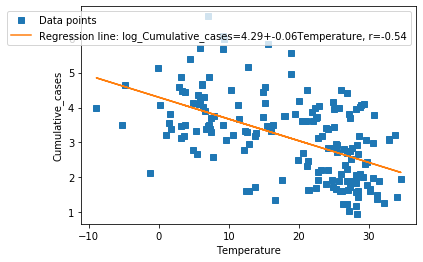

In [45]:
fig, ax = plt.subplots()
ax.plot(country_dataset.Temperature,country_dataset.log_Cumulative_cases , linewidth=0, marker='s', label='Data points')
ax.plot(country_dataset.Temperature, intercept + slope * country_dataset.Temperature, label=line)
ax.set_xlabel('Temperature')
ax.set_ylabel('Cumulative_cases')
ax.legend(facecolor='white')
plt.show()

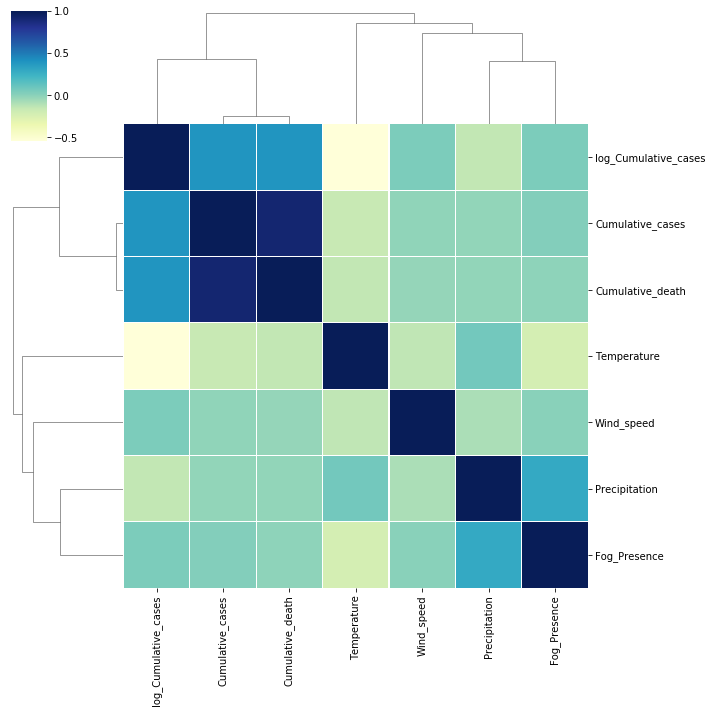

In [46]:
corrmat = country_dataset.corr() 
  
cg = sns.clustermap(corrmat, cmap ="YlGnBu", linewidths = 0.1); 
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation = 0) 
  
cg 